### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

### Dataset loading

In [2]:
df = pd.read_csv("InsuranceDataset.csv")
df.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [3]:
df.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [5]:
df.shape

(1048575, 24)

### Data Preprocessing

#### 1. Drop Duplicates 

In [6]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1041306.0,1043761.0,1043761.0,1043761.0,1043720.0,1043761.0,1043761.0,1043761.0,1043761.0,1043761.0,1043761.0
mean,652.5,198.6,97.1,2.1,1.8,282.0,27190.1,10501.2,0.5,0.7,1.9
std,669.6,165.5,87.3,0.9,1.0,932.3,54976.5,22345.9,0.8,0.4,0.8
min,1.0,1.0,0.0,0.0,1.0,0.0,0.3,0.1,0.0,0.0,1.0
25%,213.0,108.0,0.0,1.0,1.0,0.0,7473.6,3262.2,0.3,0.0,1.0
50%,630.0,159.0,88.0,2.0,1.0,0.0,14669.2,5955.4,0.4,1.0,2.0
75%,977.0,218.0,172.0,3.0,3.0,0.0,29242.3,11377.4,0.5,1.0,3.0
max,9250.0,670.0,231.0,4.0,4.0,9000.0,6196973.5,2562477.7,157.6,1.0,5.0


#### 2. Drop NA

In [7]:
df.dropna(inplace=True)
df.isnull().any()

Area_Service                             False
Hospital County                          False
Hospital Id                              False
Age                                      False
Gender                                   False
Cultural_group                           False
ethnicity                                False
Days_spend_hsptl                         False
Admission_type                           False
Home or self care,                       False
ccs_diagnosis_code                       False
ccs_procedure_code                       False
apr_drg_description                      False
Code_illness                             False
Mortality risk                           False
Surg_Description                         False
Weight_baby                              False
Abortion                                 False
Emergency dept_yes/No                    False
Tot_charg                                False
Tot_cost                                 False
ratio_of_tota

#### 3. Drop Columns

In [8]:
df.drop(['Area_Service','Hospital County','Hospital Id','Gender','Cultural_group',"ethnicity","apr_drg_description","Weight_baby",'Abortion','Payment_Typology'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1043760
Data columns (total 14 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1041265 non-null  object 
 1   Days_spend_hsptl                       1041265 non-null  object 
 2   Admission_type                         1041265 non-null  object 
 3   Home or self care,                     1041265 non-null  object 
 4   ccs_diagnosis_code                     1041265 non-null  int64  
 5   ccs_procedure_code                     1041265 non-null  int64  
 6   Code_illness                           1041265 non-null  int64  
 7   Mortality risk                         1041265 non-null  float64
 8   Surg_Description                       1041265 non-null  object 
 9   Emergency dept_yes/No                  1041265 non-null  object 
 10  Tot_charg                              104

###4.Rename Column Names

In [10]:
df = df.rename(columns={'Mortality risk':'Mortality_risk',"Home or self care,":"Home_or_self_care",'Emergency dept_yes/No':'Emergency_dept_yes/No'})
df.columns

Index(['Age', 'Days_spend_hsptl', 'Admission_type', 'Home_or_self_care',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'Code_illness',
       'Mortality_risk', 'Surg_Description', 'Emergency_dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result'],
      dtype='object')

####5. Converting Columns to Right Datatypes

In [11]:
df.replace({'Days_spend_hsptl': '120 +'}, 120, inplace=True)
df['Mortality_risk'] = df['Mortality_risk'].astype(int)

In [12]:
df

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
0,30 to 49,4,Elective,Home or Self Care,122,0,1,1,Medical,Y,5511.95,5582.49,1.012798,1
1,70 or Older,4,Urgent,Short-term Hospital,197,0,3,2,Medical,Y,4783.20,5162.82,1.079365,1
2,30 to 49,3,Urgent,Home or Self Care,122,0,1,1,Medical,Y,3829.15,4056.52,1.059379,1
3,0 to 17,1,Urgent,Home or Self Care,122,0,1,1,Medical,Y,1108.20,1644.75,1.484167,0
4,70 or Older,3,Elective,Home or Self Care,122,0,2,3,Medical,Y,3418.18,3370.87,0.986161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043756,70 or Older,6,Emergency,Skilled Nursing Home,106,29,2,3,Medical,Y,69650.41,13896.82,0.199522,1
1043757,0 to 17,2,Emergency,Home or Self Care,8,231,2,1,Medical,N,13587.38,3918.35,0.288382,1
1043758,50 to 69,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,4,4,Medical,Y,104629.78,24746.64,0.236516,0
1043759,30 to 49,2,Emergency,Home or Self Care,143,86,1,1,Surgical,Y,27521.41,6766.04,0.245846,1


###6. Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [14]:
df['Age']  = labelencoder.fit_transform(df['Age'])
df['Admission_type'] = labelencoder.fit_transform(df['Admission_type'])
df['Home_or_self_care'] = labelencoder.fit_transform(df['Home_or_self_care'])
df['Surg_Description'] = labelencoder.fit_transform(df['Surg_Description'])
df['Emergency_dept_yes/No'] = labelencoder.fit_transform(df['Emergency_dept_yes/No'])

In [15]:
df.corr()

,Age,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
Age,1.000000,-0.109385,0.302961,-0.223039,-0.119909,0.413520,0.498528,0.092201,0.342891,0.099697,0.084832,-0.049608,0.001983
Admission_type,-0.109385,1.000000,-0.040385,0.012607,-0.002615,0.019216,0.013942,-0.163797,-0.076151,-0.031345,-0.022222,0.022305,-0.001403
Home_or_self_care,0.302961,-0.040385,1.000000,-0.070088,-0.000530,0.241575,0.243000,0.023579,0.142063,0.107349,0.096862,-0.012959,0.000477
ccs_diagnosis_code,-0.223039,0.012607,-0.070088,1.000000,0.051307,-0.181906,-0.269338,-0.148600,-0.100412,-0.076322,-0.041976,0.030690,0.000317
ccs_procedure_code,-0.119909,-0.002615,-0.000530,0.051307,1.000000,0.013522,-0.035020,0.047185,-0.170406,0.025710,0.034001,0.017527,-0.000441
Code_illness,0.413520,0.019216,0.241575,-0.181906,0.013522,1.000000,0.635410,-0.084941,0.307177,0.290234,0.246470,-0.033883,0.002065
Mortality_risk,0.498528,0.013942,0.243000,-0.269338,-0.035020,0.635410,1.000000,-0.068615,0.294515,0.221497,0.181717,-0.036955,0.002483
Surg_Description,0.092201,-0.163797,0.023579,-0.148600,0.047185,-0.084941,-0.068615,1.000000,-0.277383,0.210457,0.192765,-0.010672,-0.002039
Emergency_dept_yes/No,0.342891,-0.076151,0.142063,-0.100412,-0.170406,0.307177,0.294515,-0.277383,1.000000,0.010675,-0.009997,-0.049358,0.002676
Tot_charg,0.099697,-0.031345,0.107349,-0.076322,0.025710,0.290234,0.221497,0.210457,0.010675,1.000000,0.723527,-0.043142,-0.001055


In [16]:
df['Result'].value_counts()

1    780361
0    260904
Name: Result, dtype: int64

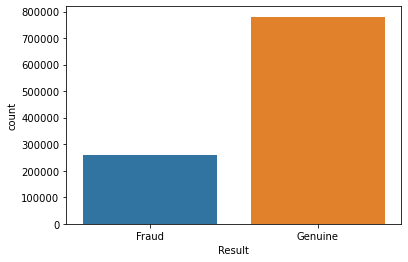

In [17]:
g = sns.countplot(df['Result'])
g.set_xticklabels(['Fraud','Genuine'])
plt.show()

##Assigning X and Y on Variable

In [18]:
X = df.drop(['Result'],axis=1)
Y = df.Result

##Oversampling Complete Dataset using SMOTETomek

In [20]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy="auto",random_state=42)
X_smt, Y_smt = smt.fit_sample(X,Y)

In [21]:
unique, count = np.unique(Y_smt, return_counts=True)
count

array([718461, 718461], dtype=int64)

##Train Test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X_smt,Y_smt,test_size=0.2,stratify=Y_smt)

In [23]:
unique, count = np.unique(Y_train,return_counts=True)
count

array([574768, 574769], dtype=int64)

#**Model Building**

##**Random Forest Classifier**

In [24]:
Model = RandomForestClassifier(n_estimators=13,max_features=6,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
Model.fit(X_train,Y_train)

RandomForestClassifier(max_features=6, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=13, n_jobs=-1)

In [25]:
Y_train_pred = Model.predict(X_train)
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86    574768
           1       0.82      0.95      0.88    574769

    accuracy                           0.87   1149537
   macro avg       0.88      0.87      0.87   1149537
weighted avg       0.88      0.87      0.87   1149537



In [26]:
Y_pred = Model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.66      0.75    143693
           1       0.72      0.89      0.80    143692

    accuracy                           0.77    287385
   macro avg       0.79      0.77      0.77    287385
weighted avg       0.79      0.77      0.77    287385



#**Training Model on Complete Dataset**

In [27]:
Model_final = RandomForestClassifier(n_estimators=13,max_features=6,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
Model_final.fit(X_smt,Y_smt)

RandomForestClassifier(max_features=6, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=13, n_jobs=-1)

##Save Model

In [29]:
import joblib
#Serialize the model and save
from sklearn.externals import joblib
#from joblib import dump, load
joblib.dump(Model_final, 'RFModel.joblib',0)

['RFModel.joblib']

In [30]:
import pickle
with open('Model_final.joblib','wb') as f:
  pickle.dump(Model_final,f,-1)

# Building a model for small sample for deployment purpose

In [45]:
# taking sample data from dataset..

sample = df.sample(250000)
sample.head(2)

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
563816,2,13,1,2,2,162,4,3,1,1,129340.91,42657.56,0.329807,1
28590,4,6,1,18,205,155,3,4,0,1,15045.32,7321.83,0.486652,1


In [46]:
sample.shape

(250000, 14)

In [47]:
index= sample.index.to_list()

In [48]:
# checking memory size of sample data..

sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 563816 to 311395
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    250000 non-null  int32  
 1   Days_spend_hsptl                       250000 non-null  object 
 2   Admission_type                         250000 non-null  int32  
 3   Home_or_self_care                      250000 non-null  int32  
 4   ccs_diagnosis_code                     250000 non-null  int64  
 5   ccs_procedure_code                     250000 non-null  int64  
 6   Code_illness                           250000 non-null  int64  
 7   Mortality_risk                         250000 non-null  int32  
 8   Surg_Description                       250000 non-null  int32  
 9   Emergency_dept_yes/No                  250000 non-null  int32  
 10  Tot_charg                              250000 non-n

* Now it is showing 23 MB size which will be ok for deployment part of view.

* Note: This model will may not be good fit on whole dataset. F1 score, Accuracy may drop in large proportion

In [49]:
# Checking for imbalance state

sample.Result.value_counts()

1    187559
0     62441
Name: Result, dtype: int64

In [50]:
# # seperating majority & minority classes

sample_1 = sample.loc[sample['Result']==1]
sample_0 = sample.loc[sample['Result']==0]

In [51]:
# and will do upsampling of class '1'

from sklearn.utils import resample
sample_0 = resample(sample_0, replace=True, n_samples=5500, random_state=42)

sample_upsampled = pd.concat([sample_0, sample_1], ignore_index=True)

In [52]:
sample_upsampled.shape

(193059, 14)

In [53]:
sample_upsampled.head()

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
0,2,2,0,7,185,137,2,1,0,0,5443.58,2435.65,0.447436,0
1,4,6,1,18,109,193,3,2,0,1,23357.91,10673.56,0.456957,0
2,1,5,0,8,183,134,3,1,1,0,51359.72,10413.59,0.202758,0
3,1,10,5,7,184,134,2,1,1,0,29604.54,16477.71,0.556594,0
4,2,6,5,7,152,70,1,1,0,1,16290.65,6928.71,0.425318,0


In [54]:
# Checking for imbalance state

sample_upsampled.Result.value_counts(normalize=True)

1    0.971511
0    0.028489
Name: Result, dtype: float64

In [55]:
sample_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193059 entries, 0 to 193058
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    193059 non-null  int32  
 1   Days_spend_hsptl                       193059 non-null  object 
 2   Admission_type                         193059 non-null  int32  
 3   Home_or_self_care                      193059 non-null  int32  
 4   ccs_diagnosis_code                     193059 non-null  int64  
 5   ccs_procedure_code                     193059 non-null  int64  
 6   Code_illness                           193059 non-null  int64  
 7   Mortality_risk                         193059 non-null  int32  
 8   Surg_Description                       193059 non-null  int32  
 9   Emergency_dept_yes/No                  193059 non-null  int32  
 10  Tot_charg                              193059 non-null  

In [56]:
X = sample_upsampled.drop(['Result'],axis=1).values
Y = sample_upsampled.Result.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=30)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15, random_state=42)

model = model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [57]:
# classification report...for train set
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4400
           1       1.00      1.00      1.00    150047

    accuracy                           1.00    154447
   macro avg       1.00      0.94      0.96    154447
weighted avg       1.00      1.00      1.00    154447



In [58]:
# classification report...for train set
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.05      0.10      1100
           1       0.97      1.00      0.99     37512

    accuracy                           0.97     38612
   macro avg       0.81      0.53      0.54     38612
weighted avg       0.96      0.97      0.96     38612



In [59]:
y_pred_whole = model.predict(sample.drop(['Result'],axis=1))

print(classification_report(sample.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.99      0.06      0.11     62441
           1       0.76      1.00      0.86    187559

    accuracy                           0.76    250000
   macro avg       0.87      0.53      0.49    250000
weighted avg       0.82      0.76      0.68    250000



# Saving Model

In [60]:
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']

Saving sample data to deployment trial

In [61]:
index = sample.index.to_list()

In [62]:
sample_test_data = df.copy()

In [63]:
sample_test_data = sample_test_data.loc[index]

In [64]:
sample_test_data.to_csv('sample_test_data.csv', index=False)